In [1]:
import cv2
import numpy as np
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
import json
import os
import shutil
#from PIL import Image
from IPython.display import Image
import pandas as pd

%matplotlib inline

## Objetivo y funcionamiento de este script

Recibe etiquetas en formato LabelMe, las convierte en formato YOLO-Seg. Después entrena la nn YOLO-Seg con esas labels.
Este código muestra cómo la red identifica las columnas y, al final del mismo, una función que recorta las columnas automáticamente y las guarda en otra carpeta.

Pasos:
1. Uso "LabelMe" para etiquetar las imagenes (las 3 columnas). De aca sale un JSON
2. Convierto las etiquetas de Labelme JSON a etiquetas YOLO-Seg. Esto las envia a una carpeta nueva
3. Entreno YOLO-Seg en esa carpeta

## Convierto etiquetas de Labelme a etiquetas compatibles con YOLO-Segment

In [ ]:
'''# Mapeo los nombres de las clases a numeros id
CLASS_MAP = {"col1": 0, "col2": 1, "col3": 2}

# Paths
LABELME_DIR = "dataset/labels"       # folder with .json files
IMAGES_DIR  = "dataset/images/ya_labeleadas"    # folder with the original images
YOLO_DIR    = "dataset_yoloseg"     # output dataset folder

# Creo estructura de carpeta para YOLO
for split in ["train", "val"]:
    os.makedirs(os.path.join(YOLO_DIR, "images", split), exist_ok=True)
    os.makedirs(os.path.join(YOLO_DIR, "labels", split), exist_ok=True)

# Funcion para convertir un json individual a formato YOLO-Seg
def convert_labelme_json(json_path, out_txt):
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    img_w = data["imageWidth"]
    img_h = data["imageHeight"]
    lines = []

    for shape in data["shapes"]:
        if shape["shape_type"] != "polygon":
            continue
        cls_id = CLASS_MAP[shape["label"]]
        pts = []
        for x, y in shape["points"]:
            pts.append(x / img_w)
            pts.append(y / img_h)
        lines.append(str(cls_id) + " " + " ".join(f"{p:.6f}" for p in pts))

    with open(out_txt, "w", encoding="utf-8") as f:
        f.write("\n".join(lines))

# Simple split: 70% train / 30% val
all_jsons = [j for j in os.listdir(LABELME_DIR) if j.endswith(".json")]
split_idx = int(0.7 * len(all_jsons))

for i, json_file in enumerate(all_jsons):
    base = os.path.splitext(json_file)[0]
    img_src = None
    for ext in [".jpg", ".jpeg", ".png"]:
        cand = os.path.join(IMAGES_DIR, base + ext)
        if os.path.exists(cand):
            img_src = cand
            break
    if img_src is None:
        print(f"Image not found for {json_file}")
        continue

    # Selecciono split
    split = "train" if i < split_idx else "val"

    # Copio imagen
    img_dst = os.path.join(YOLO_DIR, "images", split, os.path.basename(img_src))
    shutil.copy(img_src, img_dst)

    # Convierto label
    txt_dst = os.path.join(YOLO_DIR, "labels", split, base + ".txt")
    convert_labelme_json(os.path.join(LABELME_DIR, json_file), txt_dst)

print("Conversion completada.")'''

## Entreno la red neuronal YOLO-Seg

In [2]:
# Cargar modelo base de segmentación
model = YOLO("yolov8s-seg.pt")  # versión ligera; podés usar yolov8m-seg.pt si querés más precisión

# Entrenar
model.train(
    data="data.yaml",
    epochs=100,
    imgsz=1024,
    batch=8,
    degrees=20,
    translate=0.2,
    scale=0.2,
    shear=3.0,
    flipud=0.1,
    fliplr=0.5,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4
)

New https://pypi.org/project/ultralytics/8.3.179 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=20, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.1, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train23, nbs=64, nms=False, opset=None, optimize=F

train: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/train... 125 images, 0 backgrounds, 0 corrupt: 100%|██████████| 125/125 [00:00<00:00, 2104.98it/s]

train: New cache created: /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 133.9±84.2 MB/s, size: 150.5 KB)


val: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<00:00, 711.80it/s]

val: New cache created: /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val.cache


Plotting labels to runs/segment/train23/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 8 dataloader workers
Logging results to runs/segment/train23
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.61G      0.941      2.477      3.658      1.213         27       1024: 100%|██████████| 16/16 [00:05<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]

                   all         55        165       0.73      0.855      0.856      0.689       0.73      0.855      0.856       0.85



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.54G     0.3967     0.3404      1.439     0.8678         30       1024: 100%|██████████| 16/16 [00:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all         55        165      0.827      0.963      0.989      0.899      0.827      0.963      0.989       0.98



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.78G     0.4351     0.3474      1.003     0.8651         28       1024: 100%|██████████| 16/16 [00:04<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]

                   all         55        165       0.93      0.966      0.993      0.743       0.93      0.966      0.993      0.987



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100       5.7G     0.4791     0.3681     0.7872      0.888         33       1024: 100%|██████████| 16/16 [00:04<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]

                   all         55        165      0.783      0.922      0.876      0.591      0.811      0.958      0.953      0.892



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100       5.7G     0.4991     0.5366      0.764     0.8854         31       1024: 100%|██████████| 16/16 [00:04<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]

                   all         55        165       0.84      0.937      0.978      0.847       0.84      0.937      0.978      0.919



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.72G     0.5208     0.3826     0.7282     0.8985         25       1024: 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.18it/s]

                   all         55        165      0.781          1      0.926      0.777      0.781          1      0.931      0.916



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100       5.6G     0.4889     0.3452     0.6469      0.892         27       1024: 100%|██████████| 16/16 [00:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]

                   all         55        165      0.979      0.994      0.994      0.798      0.979      0.994      0.994      0.953



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.66G     0.4602     0.3573     0.5612     0.8807         26       1024: 100%|██████████| 16/16 [00:04<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.21it/s]

                   all         55        165      0.944      0.994      0.994      0.872      0.944      0.994      0.994      0.935



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.71G     0.5137     0.3178     0.5495     0.8985         38       1024: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]

                   all         55        165      0.981       0.99      0.994      0.894      0.981       0.99      0.994      0.969



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.71G     0.4243     0.3172     0.4814     0.8596         25       1024: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]

                   all         55        165      0.997      0.993      0.995      0.877      0.997      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.67G     0.4153      0.301      0.465     0.8576         30       1024: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all         55        165      0.998          1      0.995      0.909      0.998          1      0.995       0.99



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.72G     0.3993     0.2884     0.4415     0.8582         32       1024: 100%|██████████| 16/16 [00:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all         55        165      0.997          1      0.995      0.918      0.997          1      0.995      0.979



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100       5.7G     0.3873     0.2728      0.421     0.8494         22       1024: 100%|██████████| 16/16 [00:04<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]

                   all         55        165      0.998          1      0.995      0.922      0.998          1      0.995      0.988



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.71G     0.3614     0.2624     0.4059      0.845         20       1024: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all         55        165      0.996          1      0.995      0.929      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.68G     0.3706     0.3525     0.3924     0.8547         32       1024: 100%|██████████| 16/16 [00:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]

                   all         55        165      0.991      0.994      0.995      0.945      0.991      0.994      0.995      0.989



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.59G     0.3396     0.2659     0.3689     0.8388         21       1024: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all         55        165      0.994      0.994      0.995       0.94      0.994      0.994      0.995      0.991



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.74G     0.3669     0.2751      0.391     0.8405         27       1024: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all         55        165      0.996          1      0.995      0.903      0.996          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.75G     0.3504     0.2784      0.343     0.8518         22       1024: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all         55        165      0.998          1      0.995      0.937      0.998          1      0.995      0.983



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.72G     0.3322     0.2591     0.3304     0.8458         26       1024: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all         55        165      0.998          1      0.995       0.94      0.998          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.66G     0.3221     0.2402     0.3265     0.8411         32       1024: 100%|██████████| 16/16 [00:04<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all         55        165      0.998          1      0.995      0.938      0.998          1      0.995      0.986



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.63G     0.3209     0.2435     0.3117     0.8392         19       1024: 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all         55        165      0.998          1      0.995       0.95      0.998          1      0.995      0.994



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.66G     0.3148     0.2635     0.3212     0.8487         30       1024: 100%|██████████| 16/16 [00:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all         55        165      0.998          1      0.995      0.971      0.998          1      0.995      0.993



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.67G     0.3552     0.3718     0.3701     0.8518         31       1024: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all         55        165      0.999          1      0.995      0.949      0.999          1      0.995      0.991



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.74G       0.31     0.2743     0.3133     0.8429         18       1024: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all         55        165      0.998          1      0.995      0.965      0.998          1      0.995      0.982



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.58G     0.3143     0.2601      0.334     0.8335         30       1024: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]

                   all         55        165      0.998          1      0.995      0.958      0.998          1      0.995      0.993



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.69G     0.3078     0.2358     0.3086     0.8333         35       1024: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]

                   all         55        165      0.998          1      0.995      0.967      0.998          1      0.995      0.987



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.63G     0.3242     0.2555     0.3156     0.8426         22       1024: 100%|██████████| 16/16 [00:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all         55        165      0.998          1      0.995      0.954      0.998          1      0.995      0.988



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.71G     0.2938     0.2517     0.2983     0.8346         24       1024: 100%|██████████| 16/16 [00:04<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

                   all         55        165      0.997          1      0.995      0.977      0.997          1      0.995       0.99



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.63G      0.285     0.2336     0.2829     0.8285         23       1024: 100%|██████████| 16/16 [00:04<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all         55        165      0.997          1      0.995      0.972      0.997          1      0.995      0.988



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.68G     0.2872     0.2649     0.2948     0.8358         22       1024: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all         55        165      0.999          1      0.995      0.969      0.999          1      0.995      0.992



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.68G     0.2798     0.2598     0.2832     0.8269         26       1024: 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all         55        165      0.999          1      0.995      0.982      0.999          1      0.995      0.989



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.71G     0.3078     0.3264     0.3221     0.8414         24       1024: 100%|██████████| 16/16 [00:04<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all         55        165      0.997          1      0.995       0.97      0.997          1      0.995      0.991



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.68G     0.2686     0.2275     0.2691     0.8378         34       1024: 100%|██████████| 16/16 [00:04<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all         55        165      0.996      0.999      0.995      0.976      0.996      0.999      0.995      0.993



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.69G     0.2808      0.263     0.2745     0.8285         28       1024: 100%|██████████| 16/16 [00:04<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]

                   all         55        165      0.999          1      0.995      0.989      0.999          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.64G     0.2779     0.2777     0.2787     0.8296         31       1024: 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all         55        165      0.998          1      0.995      0.977      0.998          1      0.995      0.991



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.73G     0.2628     0.2407     0.2512     0.8221         29       1024: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all         55        165      0.998          1      0.995      0.979      0.998          1      0.995      0.988



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.78G     0.2654     0.2309     0.2519     0.8376         22       1024: 100%|██████████| 16/16 [00:04<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all         55        165      0.999          1      0.995      0.982      0.999          1      0.995      0.992



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.67G     0.2943     0.3146     0.2742     0.8412         34       1024: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]

                   all         55        165      0.998          1      0.995      0.979      0.998          1      0.995      0.978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.68G     0.2852      0.254     0.2663     0.8296         31       1024: 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]

                   all         55        165      0.998          1      0.995      0.972      0.998          1      0.995      0.988



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.67G     0.2954     0.2709     0.2703     0.8265         19       1024: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all         55        165      0.998          1      0.995      0.978      0.998          1      0.995      0.984



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.63G     0.2712     0.2425     0.2622     0.8281         28       1024: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]

                   all         55        165      0.997          1      0.995      0.973      0.997          1      0.995      0.995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.67G     0.2754     0.2468     0.2494     0.8316         31       1024: 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]

                   all         55        165      0.997          1      0.995      0.965      0.997          1      0.995      0.994



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.74G     0.2718     0.2396     0.2501     0.8269         21       1024: 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all         55        165      0.998          1      0.995      0.987      0.998          1      0.995      0.989



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.74G     0.2679     0.2304     0.2501     0.8309         33       1024: 100%|██████████| 16/16 [00:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all         55        165      0.999          1      0.995      0.981      0.999          1      0.995      0.993



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.63G     0.2534     0.2369     0.2409     0.8267         23       1024: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all         55        165      0.999          1      0.995      0.989      0.999          1      0.995      0.992



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.62G     0.2519     0.2336     0.2266     0.8258         18       1024: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]

                   all         55        165      0.999          1      0.995      0.986      0.999          1      0.995      0.992



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.65G     0.2558     0.2416     0.2453     0.8288         24       1024: 100%|██████████| 16/16 [00:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all         55        165      0.999          1      0.995      0.988      0.999          1      0.995      0.988



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.62G     0.2495     0.2374     0.2326     0.8289         23       1024: 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all         55        165      0.998          1      0.995      0.986      0.998          1      0.995      0.992



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.63G     0.2632     0.2496     0.2352     0.8327         29       1024: 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all         55        165      0.999          1      0.995      0.981      0.999          1      0.995      0.991



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100       5.7G      0.245     0.2375     0.2204     0.8183         21       1024: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all         55        165      0.999          1      0.995       0.99      0.999          1      0.995      0.987



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.73G     0.2416     0.2405     0.2235     0.8259         32       1024: 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all         55        165      0.999          1      0.995      0.993      0.999          1      0.995      0.991



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.68G     0.2433     0.2342     0.2226     0.8179         22       1024: 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all         55        165      0.999          1      0.995       0.99      0.999          1      0.995      0.987



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.68G     0.2495     0.2386     0.2293     0.8293         27       1024: 100%|██████████| 16/16 [00:04<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]

                   all         55        165      0.998          1      0.995      0.991      0.998          1      0.995      0.988



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.73G     0.2414      0.227     0.2198     0.8132         26       1024: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all         55        165      0.999          1      0.995      0.985      0.999          1      0.995      0.988



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.65G     0.2536     0.2691     0.2291     0.8326         27       1024: 100%|██████████| 16/16 [00:04<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all         55        165      0.998          1      0.995      0.988      0.998          1      0.995      0.994



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.67G     0.2414     0.2387     0.2226     0.8175         41       1024: 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all         55        165      0.999          1      0.995       0.99      0.999          1      0.995      0.985



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.67G     0.2395     0.2231     0.2178     0.8194         23       1024: 100%|██████████| 16/16 [00:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all         55        165      0.999          1      0.995      0.991      0.999          1      0.995      0.989



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.75G     0.2365     0.2206     0.2132     0.8205         30       1024: 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]

                   all         55        165      0.999          1      0.995       0.99      0.999          1      0.995      0.991



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.66G     0.2246     0.2256     0.2092     0.8269         31       1024: 100%|██████████| 16/16 [00:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all         55        165      0.999          1      0.995      0.991      0.999          1      0.995      0.991



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.66G     0.2399     0.2409     0.2183     0.8077         29       1024: 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all         55        165      0.999          1      0.995      0.991      0.999          1      0.995      0.991



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.69G       0.22     0.2154     0.1986     0.8257         22       1024: 100%|██████████| 16/16 [00:04<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all         55        165      0.999          1      0.995      0.992      0.999          1      0.995      0.989



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.68G     0.2412     0.2578      0.227     0.8245         21       1024: 100%|██████████| 16/16 [00:04<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all         55        165      0.999          1      0.995      0.982      0.999          1      0.995      0.992



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.66G     0.2389     0.2429     0.2115     0.8138         28       1024: 100%|██████████| 16/16 [00:04<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]

                   all         55        165      0.999          1      0.995      0.987      0.999          1      0.995      0.991



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.73G     0.2364     0.2316     0.2108     0.8218         27       1024: 100%|██████████| 16/16 [00:04<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]

                   all         55        165      0.998          1      0.995      0.993      0.998          1      0.995      0.993



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.68G     0.2224     0.2284     0.2003     0.8182         41       1024: 100%|██████████| 16/16 [00:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]

                   all         55        165      0.999          1      0.995      0.993      0.999          1      0.995      0.992



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.69G     0.2182     0.2233     0.1966     0.8174         29       1024: 100%|██████████| 16/16 [00:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all         55        165      0.998          1      0.995      0.993      0.998          1      0.995      0.987



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.76G     0.2259     0.2212     0.2014     0.8088         20       1024: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

                   all         55        165      0.998          1      0.995      0.992      0.998          1      0.995      0.991



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.69G     0.2241     0.2107     0.1989     0.8171         24       1024: 100%|██████████| 16/16 [00:04<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all         55        165      0.999          1      0.995      0.993      0.999          1      0.995      0.992



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.76G     0.2245     0.2248     0.1985     0.8206         28       1024: 100%|██████████| 16/16 [00:04<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all         55        165      0.999          1      0.995      0.994      0.999          1      0.995      0.987



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.73G     0.2137     0.2204     0.1847     0.8154         22       1024: 100%|██████████| 16/16 [00:04<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all         55        165      0.999          1      0.995      0.994      0.999          1      0.995      0.993



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.75G     0.1965     0.2036     0.1813     0.8132         19       1024: 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

                   all         55        165      0.999          1      0.995      0.994      0.999          1      0.995      0.993



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.76G     0.2128      0.231     0.1859     0.8218         36       1024: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all         55        165      0.999          1      0.995      0.994      0.999          1      0.995       0.99



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.76G     0.2117     0.2295     0.1845     0.8234         23       1024: 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all         55        165      0.999          1      0.995      0.993      0.999          1      0.995      0.992



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.72G     0.2109     0.2222      0.181     0.8248         22       1024: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]

                   all         55        165      0.999          1      0.995      0.994      0.999          1      0.995      0.993



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.71G     0.2031     0.2125      0.182      0.802         22       1024: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all         55        165      0.999          1      0.995      0.992      0.999          1      0.995      0.991



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.68G     0.2129     0.2283     0.1897     0.8113         29       1024: 100%|██████████| 16/16 [00:04<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]

                   all         55        165      0.999          1      0.995      0.992      0.999          1      0.995       0.99



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100       5.7G     0.1954     0.2106     0.1723     0.8125         32       1024: 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]

                   all         55        165      0.999          1      0.995      0.992      0.999          1      0.995       0.99



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.67G     0.2021     0.2227     0.1788     0.8103         24       1024: 100%|██████████| 16/16 [00:04<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]

                   all         55        165      0.999          1      0.995      0.993      0.999          1      0.995      0.992



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.68G      0.204     0.2111     0.1828      0.817         27       1024: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]

                   all         55        165      0.999          1      0.995      0.994      0.999          1      0.995      0.992



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.64G     0.1922     0.1985     0.1742     0.8229         27       1024: 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]

                   all         55        165      0.999          1      0.995      0.995      0.999          1      0.995      0.994



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.76G      0.196     0.2121     0.1768     0.8072         28       1024: 100%|██████████| 16/16 [00:04<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]

                   all         55        165      0.999          1      0.995      0.994      0.999          1      0.995      0.993



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.69G     0.1872     0.2036     0.1684     0.8062         26       1024: 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all         55        165      0.999          1      0.995      0.994      0.999          1      0.995      0.993



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.65G      0.204     0.2234     0.1796     0.8197         27       1024: 100%|██████████| 16/16 [00:04<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all         55        165      0.999          1      0.995      0.993      0.999          1      0.995      0.993



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.73G     0.2037     0.2156     0.1732     0.8094         28       1024: 100%|██████████| 16/16 [00:04<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all         55        165      0.999          1      0.995      0.993      0.999          1      0.995      0.991



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.66G      0.192     0.2207     0.1695     0.8124         28       1024: 100%|██████████| 16/16 [00:04<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]

                   all         55        165      0.999          1      0.995      0.994      0.999          1      0.995      0.993



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.64G     0.1972     0.2401     0.1864     0.8202         20       1024: 100%|██████████| 16/16 [00:04<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.14it/s]

                   all         55        165      0.999          1      0.995      0.993      0.999          1      0.995      0.991



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.82G     0.1927     0.2146     0.1715     0.8174         32       1024: 100%|██████████| 16/16 [00:04<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all         55        165      0.999          1      0.995      0.994      0.999          1      0.995      0.988



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.67G     0.1916     0.2023     0.1664      0.814         25       1024: 100%|██████████| 16/16 [00:04<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all         55        165      0.999          1      0.995      0.993      0.999          1      0.995       0.99



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.76G     0.1805     0.2049     0.1585      0.817         30       1024: 100%|██████████| 16/16 [00:04<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]

                   all         55        165      0.999          1      0.995      0.993      0.999          1      0.995      0.989



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100       5.7G     0.1884     0.2166     0.1637     0.8125         30       1024: 100%|██████████| 16/16 [00:04<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]

                   all         55        165      0.999          1      0.995      0.993      0.999          1      0.995       0.99


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.55G     0.1479     0.1749     0.1345     0.7765         15       1024: 100%|██████████| 16/16 [00:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]

                   all         55        165      0.999          1      0.995      0.994      0.999          1      0.995      0.991



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.55G     0.1432      0.177     0.1264     0.7692         15       1024: 100%|██████████| 16/16 [00:04<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]

                   all         55        165      0.999          1      0.995      0.994      0.999          1      0.995       0.99



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.55G     0.1357     0.1759     0.1229     0.7646         15       1024: 100%|██████████| 16/16 [00:04<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]

                   all         55        165      0.999          1      0.995      0.995      0.999          1      0.995      0.991



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.55G     0.1388     0.1718     0.1228     0.7682         15       1024: 100%|██████████| 16/16 [00:04<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]

                   all         55        165      0.999          1      0.995      0.993      0.999          1      0.995      0.989



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.55G     0.1483     0.1695     0.1226     0.7743         15       1024: 100%|██████████| 16/16 [00:04<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]

                   all         55        165      0.999          1      0.995      0.993      0.999          1      0.995      0.991



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.56G     0.1401     0.1736     0.1178     0.7711         15       1024: 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all         55        165      0.999          1      0.995      0.993      0.999          1      0.995       0.99



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.56G      0.138     0.1742     0.1189     0.7743         15       1024: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.27it/s]

                   all         55        165      0.999          1      0.995      0.994      0.999          1      0.995      0.989



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.55G     0.1376     0.1787     0.1172     0.7676         15       1024: 100%|██████████| 16/16 [00:04<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]

                   all         55        165      0.999          1      0.995      0.995      0.999          1      0.995       0.99



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.55G     0.1339     0.1734      0.116     0.7703         15       1024: 100%|██████████| 16/16 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]

                   all         55        165      0.999          1      0.995      0.994      0.999          1      0.995      0.991



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.56G     0.1341     0.1726     0.1167     0.7584         15       1024: 100%|██████████| 16/16 [00:04<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]

                   all         55        165      0.999          1      0.995      0.994      0.999          1      0.995      0.991



100 epochs completed in 0.172 hours.
Optimizer stripped from runs/segment/train23/weights/last.pt, 23.9MB
Optimizer stripped from runs/segment/train23/weights/best.pt, 23.9MB

Validating runs/segment/train23/weights/best.pt...
Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,761 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]


                   all         55        165      0.999          1      0.995      0.995      0.999          1      0.995      0.993
                  col1         55         55      0.999          1      0.995      0.995      0.999          1      0.995      0.994
                  col2         55         55      0.999          1      0.995      0.995      0.999          1      0.995      0.994
                  col3         55         55      0.999          1      0.995      0.995      0.999          1      0.995      0.992
Speed: 0.4ms preprocess, 7.7ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/segment/train23


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7715d5c6dd60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04

### Resultados y metricas del entrenamiento

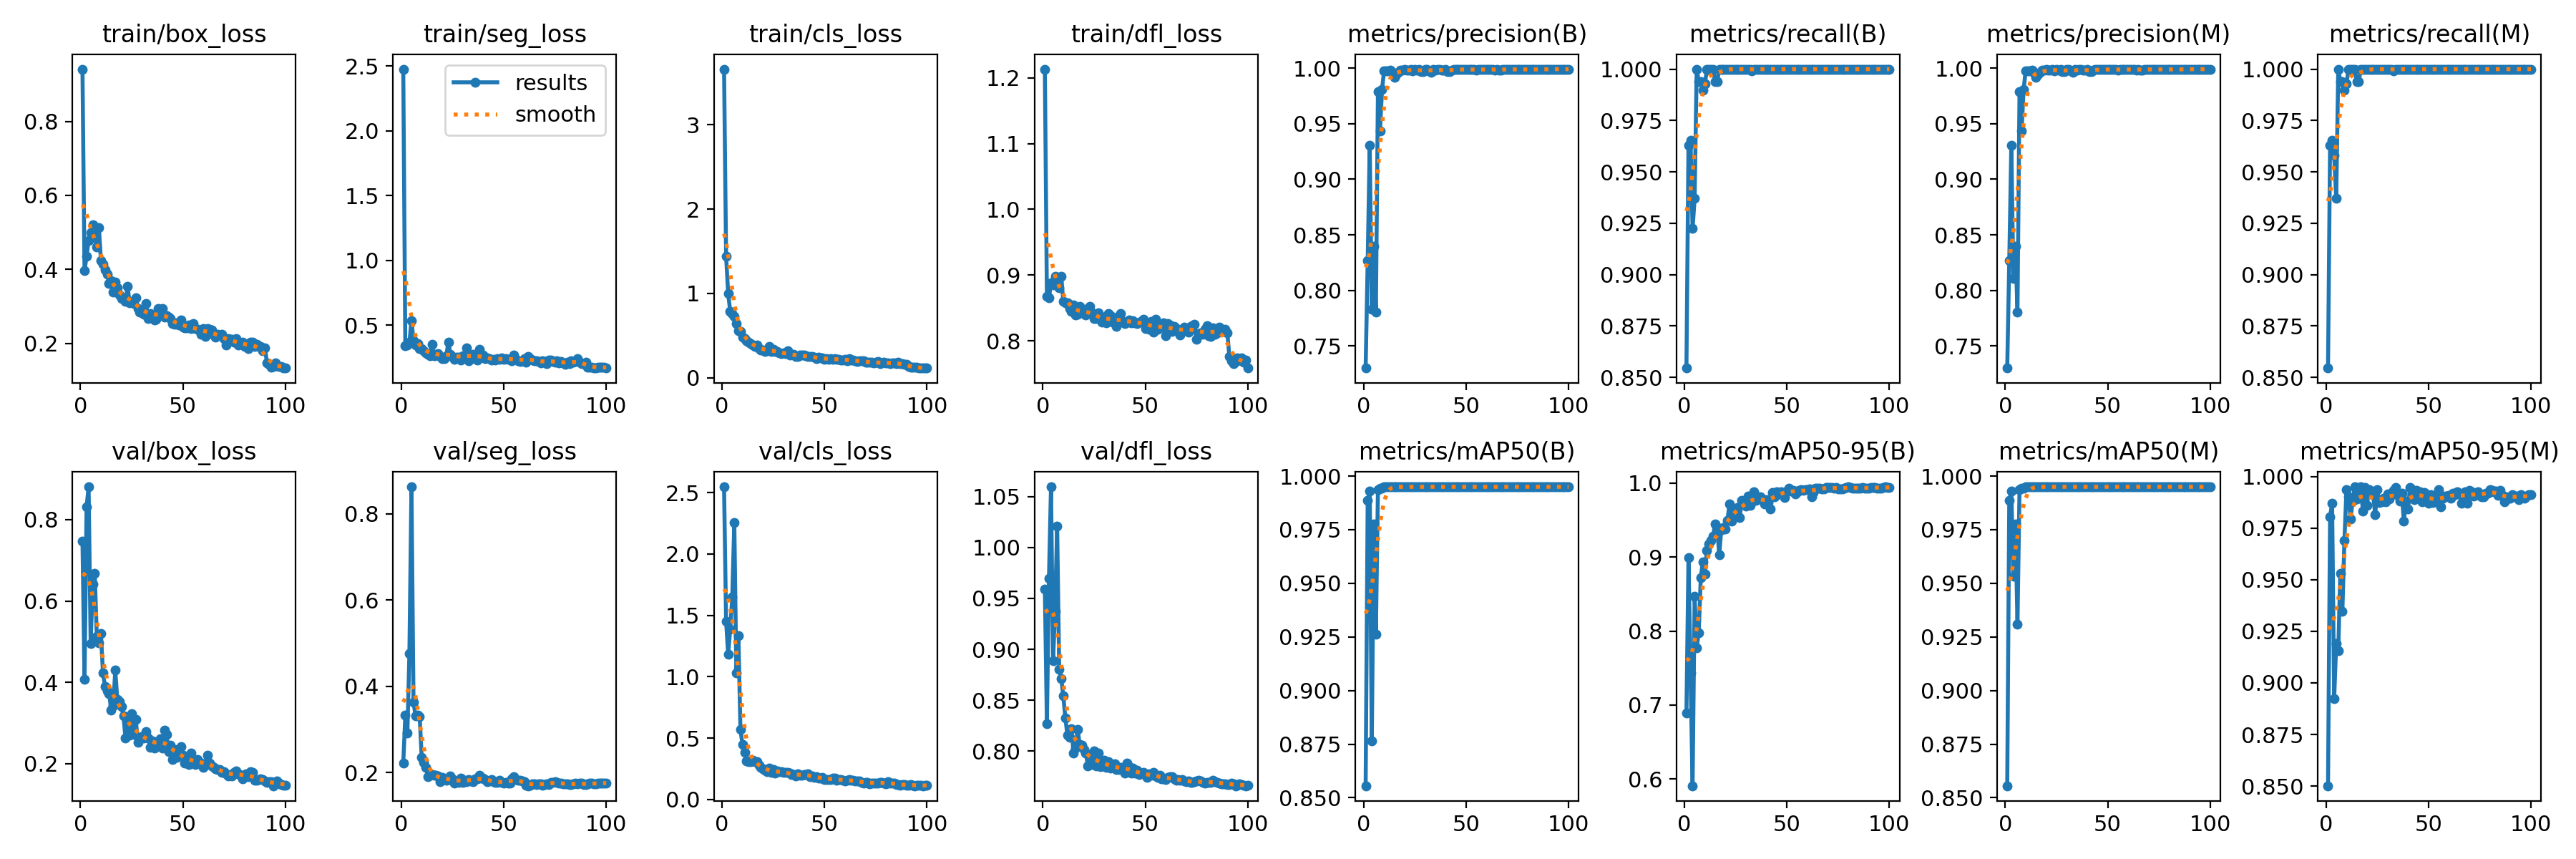

In [3]:
Image(filename='runs/segment/train23/results.png', width=2000)

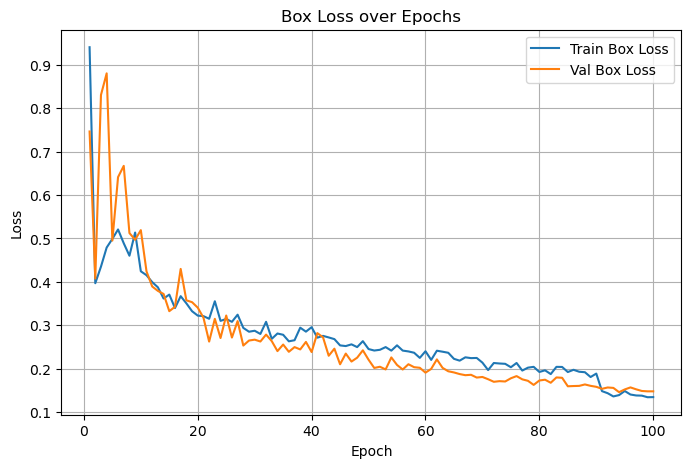

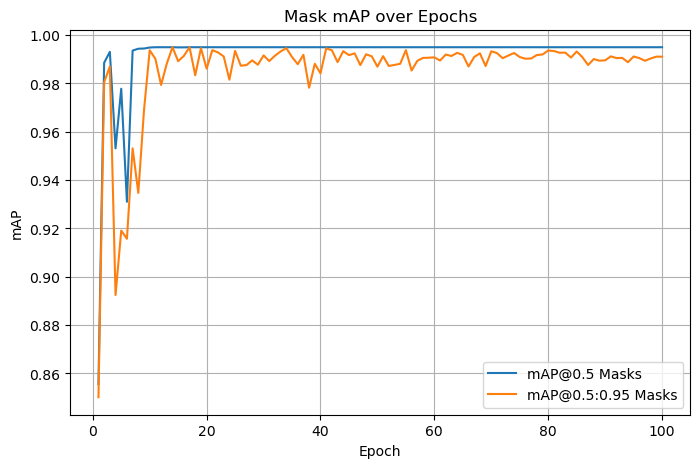

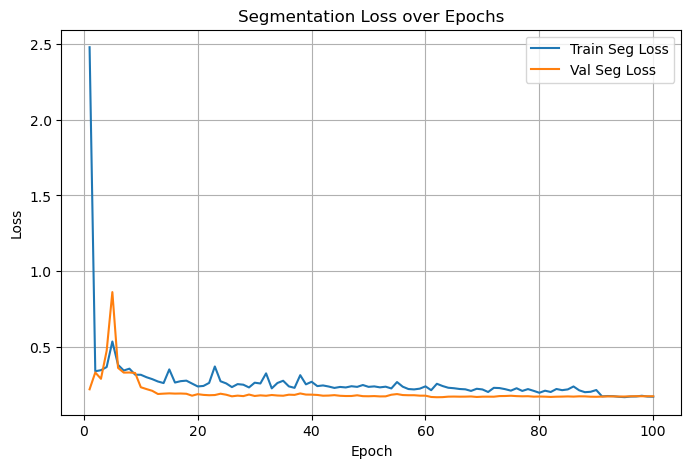

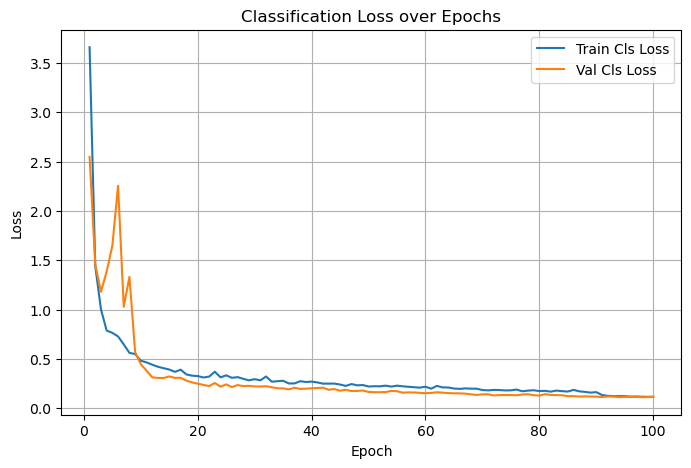

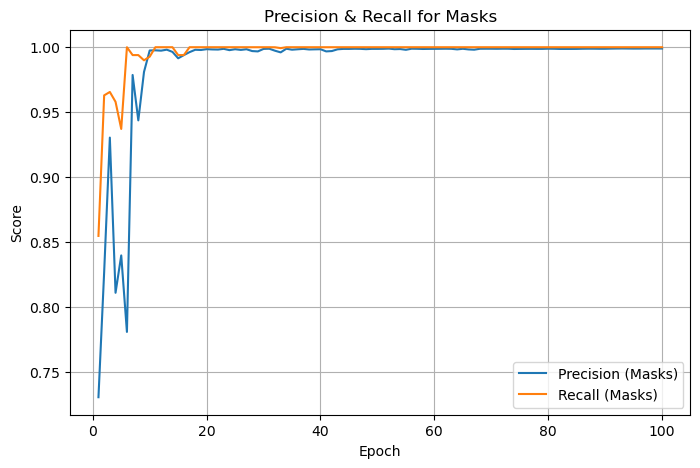

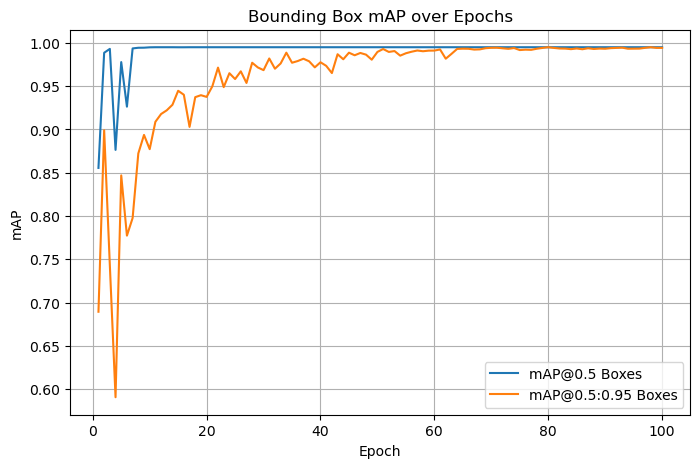

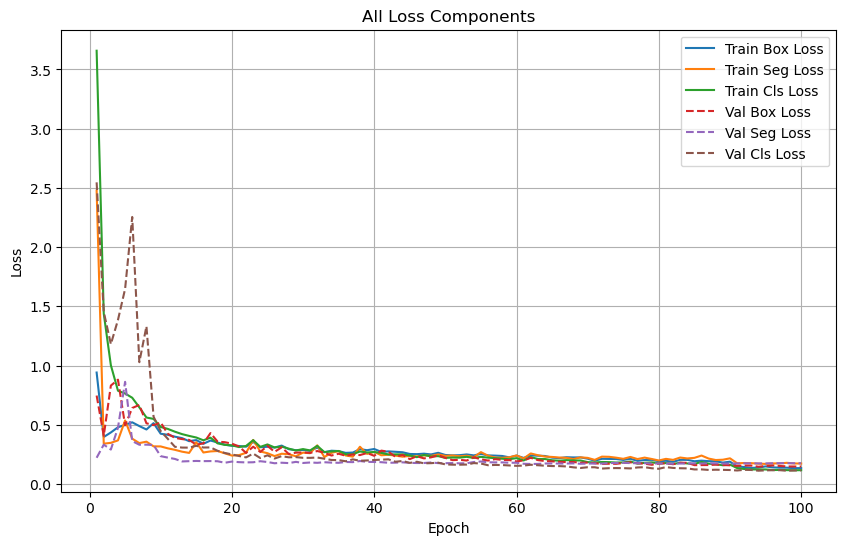

In [4]:

# Path to results CSV
csv_path = "runs/segment/train23/results.csv"
df = pd.read_csv(csv_path)

# Plot box loss
plt.figure(figsize=(8,5))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Box Loss over Epochs')
plt.legend()
plt.grid()
plt.show()

# Plot mAP for masks
plt.figure(figsize=(8,5))
plt.plot(df['epoch'], df['metrics/mAP50(M)'], label='mAP@0.5 Masks')
plt.plot(df['epoch'], df['metrics/mAP50-95(M)'], label='mAP@0.5:0.95 Masks')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('Mask mAP over Epochs')
plt.legend()
plt.grid()
plt.show()

# Plot segmentation loss
plt.figure(figsize=(8,5))
plt.plot(df['epoch'], df['train/seg_loss'], label='Train Seg Loss')
plt.plot(df['epoch'], df['val/seg_loss'], label='Val Seg Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Segmentation Loss over Epochs')
plt.legend()
plt.grid()
plt.show()

# Plot classification loss
plt.figure(figsize=(8,5))
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Cls Loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Classification Loss over Epochs')
plt.legend()
plt.grid()
plt.show()


# Precision and Recall for masks
plt.figure(figsize=(8,5))
plt.plot(df['epoch'], df['metrics/precision(M)'], label='Precision (Masks)')
plt.plot(df['epoch'], df['metrics/recall(M)'], label='Recall (Masks)')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Precision & Recall for Masks')
plt.legend()
plt.grid()
plt.show()

# mAP for boxes
plt.figure(figsize=(8,5))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5 Boxes')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95 Boxes')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('Bounding Box mAP over Epochs')
plt.legend()
plt.grid()
plt.show()

# All losses in one plot
plt.figure(figsize=(10,6))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['train/seg_loss'], label='Train Seg Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Cls Loss')
plt.plot(df['epoch'], df['val/box_loss'], '--', label='Val Box Loss')
plt.plot(df['epoch'], df['val/seg_loss'], '--', label='Val Seg Loss')
plt.plot(df['epoch'], df['val/cls_loss'], '--', label='Val Cls Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('All Loss Components')
plt.legend()
plt.grid()
plt.show()


Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,761 parameters, 0 gradients, 42.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3586.8±809.0 MB/s, size: 140.3 KB)


val: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]


                   all         55        165      0.999          1      0.995      0.995      0.999          1      0.995      0.993
Speed: 5.9ms preprocess, 11.5ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs/segment/val52
Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3968.6±1655.7 MB/s, size: 141.8 KB)


val: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


                   all         55        165      0.999          1      0.995      0.995      0.999          1      0.995      0.993
Speed: 6.9ms preprocess, 11.0ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/segment/val53
Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3997.0±1537.5 MB/s, size: 147.0 KB)


val: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


                   all         55        165      0.999          1      0.995      0.995      0.999          1      0.995      0.993
Speed: 6.4ms preprocess, 10.9ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/segment/val54
Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3650.2±1091.6 MB/s, size: 153.7 KB)


val: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


                   all         55        165      0.999          1      0.995      0.995      0.999          1      0.995      0.993
Speed: 5.4ms preprocess, 11.2ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/segment/val55
Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3600.3±1503.3 MB/s, size: 132.1 KB)


val: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]


                   all         55        165      0.999          1      0.995      0.995      0.999          1      0.995      0.993
Speed: 6.4ms preprocess, 11.5ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/segment/val56
Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6544.7±1351.7 MB/s, size: 147.9 KB)


val: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]


                   all         55        165      0.999          1      0.995      0.995      0.999          1      0.995      0.993
Speed: 5.8ms preprocess, 11.5ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/segment/val57
Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3649.2±1506.7 MB/s, size: 124.4 KB)


val: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


                   all         55        165      0.999          1      0.995      0.995      0.999          1      0.995      0.993
Speed: 7.0ms preprocess, 11.0ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/segment/val58
Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3184.6±1660.0 MB/s, size: 140.4 KB)


val: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


                   all         55        165      0.999          1      0.995      0.995      0.999          1      0.995      0.993
Speed: 7.0ms preprocess, 11.2ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/segment/val59
Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4999.9±2146.8 MB/s, size: 148.5 KB)


val: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


                   all         55        165      0.999          1      0.995      0.995      0.999          1      0.995      0.993
Speed: 6.6ms preprocess, 10.9ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/segment/val60
Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4473.8±1505.6 MB/s, size: 168.4 KB)


val: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


                   all         55        165      0.999          1      0.995      0.995      0.999          1      0.995      0.993
Speed: 6.6ms preprocess, 10.9ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/segment/val61
Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3682.7±1634.7 MB/s, size: 128.7 KB)


val: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


                   all         55        165      0.999          1      0.995      0.995      0.999          1      0.995      0.993
Speed: 6.9ms preprocess, 11.0ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/segment/val62
Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5655.1±999.7 MB/s, size: 152.3 KB)


val: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


                   all         55        165      0.999          1      0.995      0.995      0.999          1      0.995      0.993
Speed: 6.3ms preprocess, 11.1ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/segment/val63
Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3541.1±1404.6 MB/s, size: 147.5 KB)


val: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


                   all         55        165      0.999          1      0.995      0.995      0.999          1      0.995      0.993
Speed: 7.1ms preprocess, 11.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/segment/val64
Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6206.5±1179.3 MB/s, size: 157.5 KB)


val: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


                   all         55        165      0.999          1      0.995      0.995      0.999          1      0.995      0.993
Speed: 7.5ms preprocess, 11.0ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/segment/val65
Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5819.5±894.4 MB/s, size: 141.9 KB)


val: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


                   all         55        165      0.999          1      0.995      0.995      0.999          1      0.995      0.993
Speed: 7.1ms preprocess, 11.0ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/segment/val66
Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4817.4±1734.9 MB/s, size: 154.3 KB)


val: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


                   all         55        165      0.993          1      0.995      0.995      0.993          1      0.995      0.993
Speed: 6.3ms preprocess, 11.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/segment/val67
Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4347.7±1057.7 MB/s, size: 153.7 KB)


val: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


                   all         55        165      0.992          1      0.995      0.995      0.992          1      0.995      0.993
Speed: 6.7ms preprocess, 11.1ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/segment/val68
Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2236.7±622.7 MB/s, size: 165.1 KB)


val: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


                   all         55        165      0.956          1      0.994      0.994      0.956          1      0.994      0.992
Speed: 6.9ms preprocess, 11.2ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/segment/val69
Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3129.3±1388.2 MB/s, size: 136.7 KB)


val: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]


                   all         55        165      0.796          1      0.988      0.988      0.796          1      0.988      0.986
Speed: 6.1ms preprocess, 11.0ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/segment/val70
Ultralytics 8.3.167 🚀 Python-3.9.23 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 7842MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4718.7±1876.3 MB/s, size: 145.9 KB)


val: Scanning /home/federico/Desktop/TESIS/paper1/YOLO-segment/prueba_entrenamiento_yolo_segment/dataset_yoloseg/labels/val.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]


                   all         55        165      0.323          1      0.841      0.841      0.323          1      0.841      0.839
Speed: 6.6ms preprocess, 11.0ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/segment/val71


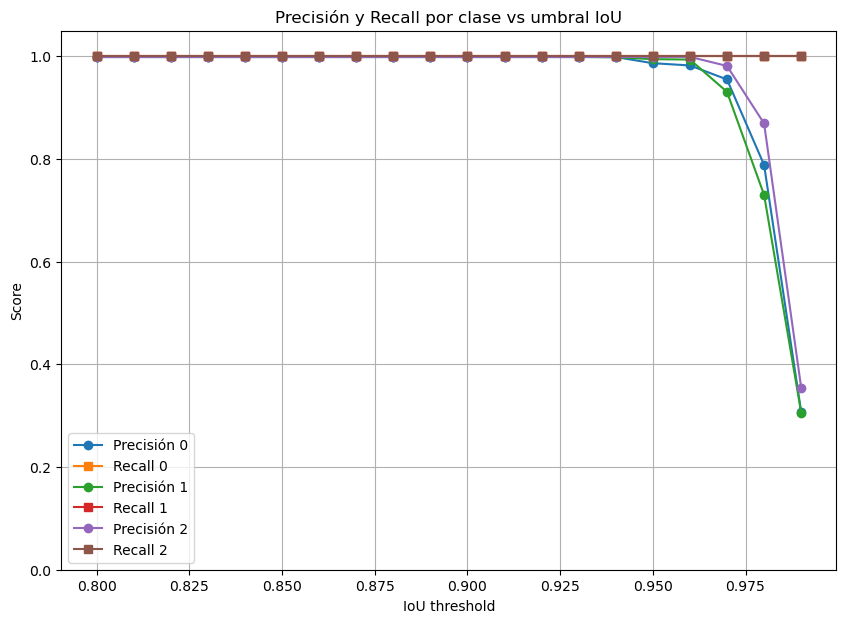

In [9]:
# Precision y recall segun umbral IoU

# cargar modelo
model = YOLO("runs/segment/train23/weights/best.pt")

# definir umbrales IoU que queremos analizar
ious = np.arange(0.8, 1.0, 0.01)

precisions = []
recalls = []

for iou in ious:
    results = model.val(iou=iou, split="val", verbose=False)
    precisions.append(results.box.p)  # array con precisión por clase
    recalls.append(results.box.r)     # array con recall por clase

# convertir a arrays (shape: n_ious × n_classes)
precisions = np.array(precisions)
recalls = np.array(recalls)

# nombres de clases
class_names = model.names

# graficar
plt.figure(figsize=(10,7))
for i, cname in enumerate(class_names):
    plt.plot(ious, precisions[:, i], marker="o", label=f"Precisión {cname}")
    plt.plot(ious, recalls[:, i], marker="s", label=f"Recall {cname}")

plt.xlabel("IoU threshold")
plt.ylabel("Score")
plt.title("Precisión y Recall por clase vs umbral IoU")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.show()


In [8]:
import pandas as pd

# cargar resultados del entrenamiento
csv_path = "runs/segment/train23/results.csv"
df = pd.read_csv(csv_path)

# mostrar las últimas filas para ver convergencia
print(df.tail())

# extraer los valores finales de métricas
final_row = df.iloc[-1]

map50 = final_row['metrics/mAP50(M)']
map5095 = final_row['metrics/mAP50-95(M)']
precision = final_row['metrics/precision(M)']
recall = final_row['metrics/recall(M)']

print(f"mAP@0.5: {map50:.4f}")
print(f"mAP@[.5:.95]: {map5095:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


    epoch     time  train/box_loss  train/seg_loss  train/cls_loss  \
95     96  593.003         0.14014         0.17364         0.11781   
96     97  598.417         0.13796         0.17420         0.11892   
97     98  604.188         0.13758         0.17871         0.11716   
98     99  610.596         0.13392         0.17339         0.11596   
99    100  620.032         0.13414         0.17259         0.11675   

    train/dfl_loss  metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
95         0.77108               0.99895                1.0             0.995   
96         0.77431               0.99900                1.0             0.995   
97         0.76763               0.99900                1.0             0.995   
98         0.77034               0.99900                1.0             0.995   
99         0.75841               0.99899                1.0             0.995   

    metrics/mAP50-95(B)  ...  metrics/recall(M)  metrics/mAP50(M)  \
95              0.99340

## Prueba sobre una imagen

In [6]:
# Ruta a tu modelo entrenado y a la imagen de prueba
MODEL_PATH = "runs/segment/train23/weights/best.pt"
IMG_PATH = "sample338.jpeg"   #1,7,17,26,33,43,46,47,54,55,57,63,74,75,80,84,98,109,158,178,189,194

In [7]:
# Cargar modelo y hacer predicción
model = YOLO(MODEL_PATH)
results = model.predict(source=IMG_PATH, imgsz=1024, conf=0.5, verbose=False)

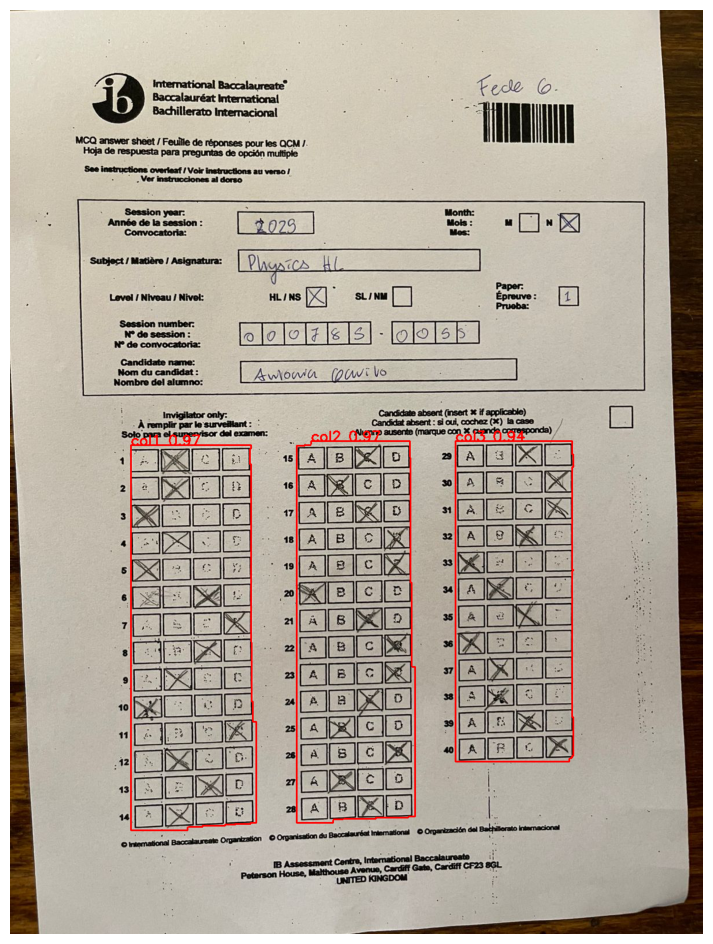

In [8]:
#print(results)
#for r in results:
#    print("Boxes:", r.boxes)
#    print("Masks:", r.masks)

# Cargar la imagen original con OpenCV
img = cv2.imread(IMG_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Dibujar polígonos detectados con confianza
for r in results:
    if r.masks is None:
        continue
    for seg, cls_id, conf in zip(r.masks.xy, r.boxes.cls, r.boxes.conf):
        pts = seg.astype(int)
        cv2.polylines(img, [pts], isClosed=True, color=(255, 0, 0), thickness=2)
        
        # Texto con clase y confianza
        label = f"{model.names[int(cls_id)]} {conf:.2f}"
        cv2.putText(img, label, tuple(pts[0]),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# Mostrar en Jupyter
plt.figure(figsize=(12,12))
plt.imshow(img)
plt.axis('off')
plt.show()

✅ Guardado: cropped_columns/sample338/col3.png (best conf=0.940)


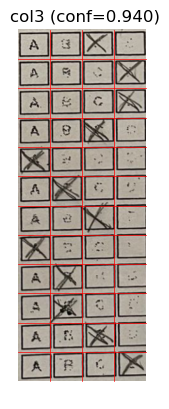

✅ Guardado: cropped_columns/sample338/col1.png (best conf=0.968)


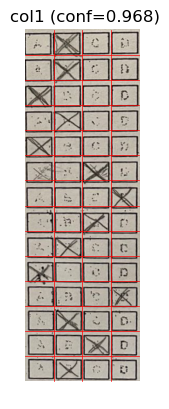

✅ Guardado: cropped_columns/sample338/col2.png (best conf=0.969)


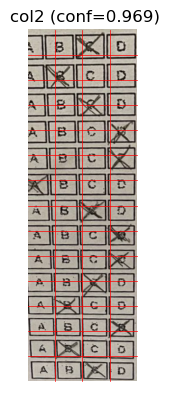

In [9]:

# Carpeta de salida
OUTPUT_DIR = "cropped_columns"
img_basename = os.path.splitext(os.path.basename(IMG_PATH))[0]
img_folder = os.path.join(OUTPUT_DIR, img_basename)
os.makedirs(img_folder, exist_ok=True)

# Cargar imagen original
orig_img = cv2.imread(IMG_PATH)
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

# Función para ordenar puntos en orden TL, TR, BR, BL
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect

# --- queremos exactamente una por clase ---
wanted = {"col1", "col2", "col3"}
alias_to_canonical = {"cpl3": "col3"}  # por si el modelo nombra 'cpl3' en vez de 'col3'
best = {k: {"conf": -1.0, "warped": None} for k in wanted}

# Procesar cada máscara
for r in results:
    if r.masks is None:
        continue

    classes = r.boxes.cls.squeeze().cpu().numpy()
    confs   = r.boxes.conf.squeeze().cpu().numpy()
    segs    = r.masks.xy

    if np.isscalar(classes):
        classes = np.array([classes])
    if np.isscalar(confs):
        confs   = np.array([confs])

    for seg, cls_id, conf in zip(segs, classes, confs):
        class_name = model.names[int(cls_id)]
        class_name = alias_to_canonical.get(class_name, class_name)
        if class_name not in wanted:
            continue

        pts = np.asarray(seg, dtype=np.float32)

        # Aproximar a 4 puntos
        if len(pts) > 4:
            contour = pts.reshape(-1, 1, 2)
            epsilon = 0.02 * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon, True)
            if len(approx) == 4:
                pts = approx.reshape(4, 2)
            else:
                x, y, w, h = cv2.boundingRect(contour)
                pts = np.array([[x, y], [x+w, y], [x+w, y+h], [x, y+h]], dtype=np.float32)

        # Ordenar TL, TR, BR, BL
        rect = order_points(pts)

        # Calcular dimensiones destino
        (tl, tr, br, bl) = rect
        widthA  = np.linalg.norm(br - bl)
        widthB  = np.linalg.norm(tr - tl)
        heightA = np.linalg.norm(tr - br)
        heightB = np.linalg.norm(tl - bl)
        maxWidth  = int(max(widthA, widthB))
        maxHeight = int(max(heightA, heightB))

        if maxWidth < 5 or maxHeight < 5:
            continue

        dst = np.array([
            [0, 0],
            [maxWidth - 1, 0],
            [maxWidth - 1, maxHeight - 1],
            [0, maxHeight - 1]
        ], dtype=np.float32)

        M = cv2.getPerspectiveTransform(rect, dst)
        warped = cv2.warpPerspective(orig_img, M, (maxWidth, maxHeight))

        # Guardar el mejor según conf
        if float(conf) > best[class_name]["conf"]:
            best[class_name]["conf"] = float(conf)
            best[class_name]["warped"] = warped

# Configuración de grids por clase
grid_specs = {
    "col1": (14, 4),
    "col2": (14, 4),
    "col3": (12, 4)
}

# Guardar y plotear
for cname in wanted:
    warped = best[cname]["warped"]
    conf   = best[cname]["conf"]
    if warped is None:
        print(f"[INFO] No se encontró {cname}, no se guarda ni plotea.")
        continue

    save_path = os.path.join(img_folder, f"{cname}.png")
    ok = cv2.imwrite(save_path, cv2.cvtColor(warped, cv2.COLOR_RGB2BGR))
    if ok:
        print(f"✅ Guardado: {save_path} (best conf={conf:.3f})")
    else:
        print(f"[WARN] Falló al guardar {save_path}")

    # Mostrar plot con grid
    plt.figure()#figsize=(18, 10))
    plt.imshow(warped)
    plt.title(f"{cname} (conf={conf:.3f})")

    # Dibujar líneas del grid
    n_rows, n_cols = grid_specs[cname]
    h, w = warped.shape[:2]

    # Líneas horizontales
    for i in range(1, n_rows):
        y = i * h / n_rows
        plt.plot([0, w], [y, y], color='red', linewidth=0.5)

    # Líneas verticales
    for j in range(1, n_cols):
        x = j * w / n_cols
        plt.plot([x, x], [0, h], color='red', linewidth=0.5)

    plt.axis('off')
    plt.show()

para mostrar mas cosas ...

✅ Guardado: cropped_columns/sample46/col2.png (best conf=0.963)


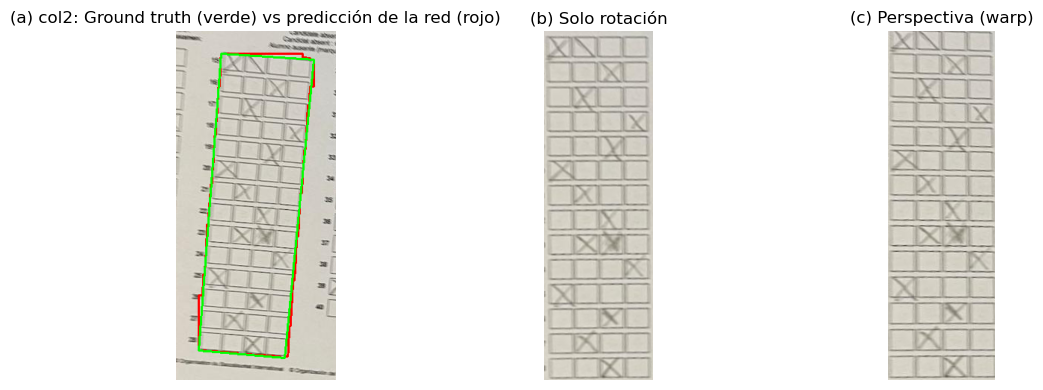

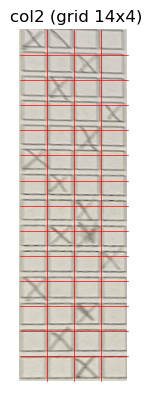

✅ Guardado: cropped_columns/sample46/col1.png (best conf=0.961)


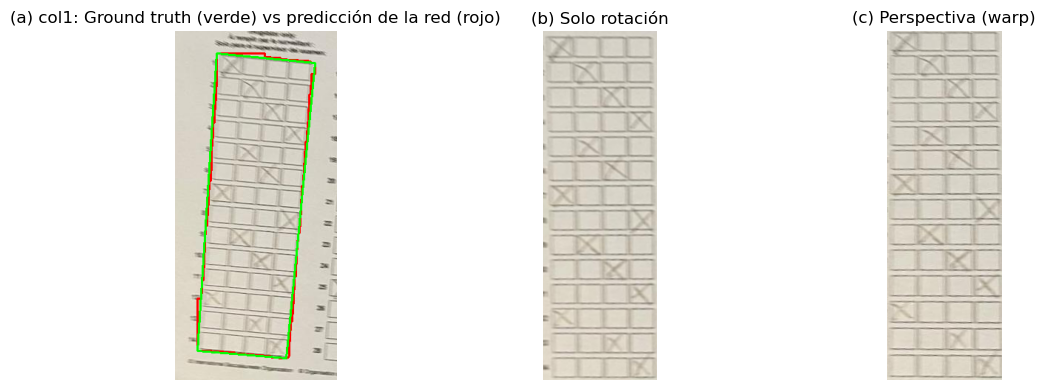

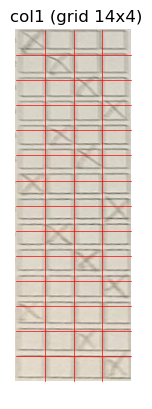

✅ Guardado: cropped_columns/sample46/col3.png (best conf=0.963)


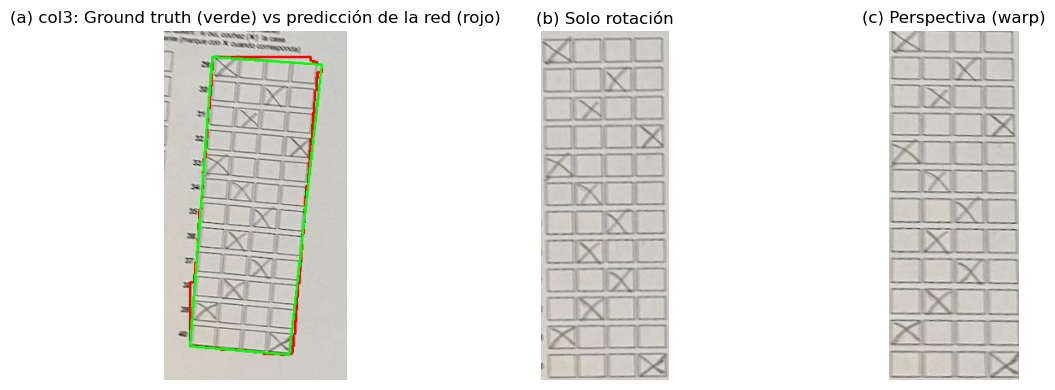

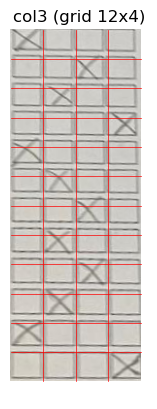

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# --- helpers de visualización y recortes ---
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect

def draw_poly(image, poly, color=(0, 255, 0), thickness=2, close=True):
    img = image.copy()
    p = np.array(poly, dtype=np.int32).reshape(-1, 1, 2)
    cv2.polylines(img, [p], isClosed=close, color=color, thickness=thickness)
    return img

def context_crop(image, poly, pad=20):
    poly = np.asarray(poly)
    x1, y1 = np.min(poly[:, 0]), np.min(poly[:, 1])
    x2, y2 = np.max(poly[:, 0]), np.max(poly[:, 1])
    x1 = max(int(x1) - pad, 0)
    y1 = max(int(y1) - pad, 0)
    x2 = min(int(x2) + pad, image.shape[1] - 1)
    y2 = min(int(y2) + pad, image.shape[0] - 1)
    crop = image[y1:y2, x1:x2].copy()
    # trasladar polígonos al sistema del recorte
    shift = np.array([x1, y1], dtype=np.float32)
    return crop, shift

def minarea_rotated_crop(image, cnt):
    rrect = cv2.minAreaRect(cnt)          # ((cx,cy), (w,h), angle)
    box   = cv2.boxPoints(rrect)          # 4x2
    box   = box.astype(int)               # <---- cambiado aquí

    (cx, cy), (w, h), angle = rrect
    w, h = int(w), int(h)
    if w <= 0 or h <= 0:
        return None, box.astype(np.float32)

    M = cv2.getRotationMatrix2D((cx, cy), angle, 1.0)
    rotated = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    rot_crop = cv2.getRectSubPix(rotated, (w, h), (cx, cy))
    return rot_crop, box.astype(np.float32)


# queremos exactamente una por clase
wanted = {"col1", "col2", "col3"}
alias_to_canonical = {"cpl3": "col3"}  # por si el modelo nombra 'cpl3' en vez de 'col3'
best = {
    k: {
        "conf": -1.0,
        "warped": None,
        "rot_crop": None,
        "poly": None,        # polígono original de YOLO-Seg
        "approx": None,      # cuadrilátero approxPolyDP/minAreaRect
        "rect_src": None,    # cuadrilátero ordenado TL,TR,BR,BL (para warp)
    }
    for k in wanted
}

# Procesar cada máscara
for r in results:
    if r.masks is None:
        continue

    classes = r.boxes.cls.squeeze().cpu().numpy()
    confs   = r.boxes.conf.squeeze().cpu().numpy()
    segs    = r.masks.xy

    if np.isscalar(classes):
        classes = np.array([classes])
    if np.isscalar(confs):
        confs   = np.array([confs])

    for seg, cls_id, conf in zip(segs, classes, confs):
        class_name = model.names[int(cls_id)]
        class_name = alias_to_canonical.get(class_name, class_name)
        if class_name not in wanted:
            continue

        pts = np.asarray(seg, dtype=np.float32)  # (N,2)

        # Aproximar a 4 puntos (preferimos approxPolyDP y, si falla, minAreaRect)
        contour = pts.reshape(-1, 1, 2)
        perim = cv2.arcLength(contour, True)
        epsilon = max(3.0, 0.02 * perim)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        if len(approx) == 4:
            quad = approx.reshape(4, 2).astype(np.float32)
        else:
            # Fallback robusto: rectángulo rotado mínimo
            rrect = cv2.minAreaRect(contour)
            quad = cv2.boxPoints(rrect).astype(np.float32)

        rect = order_points(quad)

        # Calcular dimensiones destino
        (tl, tr, br, bl) = rect
        widthA  = np.linalg.norm(br - bl)
        widthB  = np.linalg.norm(tr - tl)
        heightA = np.linalg.norm(tr - br)
        heightB = np.linalg.norm(tl - bl)
        maxWidth  = int(max(widthA, widthB))
        maxHeight = int(max(heightA, heightB))

        if maxWidth < 5 or maxHeight < 5:
            continue

        dst = np.array([
            [0, 0],
            [maxWidth - 1, 0],
            [maxWidth - 1, maxHeight - 1],
            [0, maxHeight - 1]
        ], dtype=np.float32)

        M = cv2.getPerspectiveTransform(rect, dst)
        warped = cv2.warpPerspective(orig_img, M, (maxWidth, maxHeight))

        # Recorte solo-rotación (minAreaRect)
        rot_only_crop, _box = minarea_rotated_crop(orig_img, contour)

        # Guardar el mejor según conf
        if float(conf) > best[class_name]["conf"]:
            best[class_name]["conf"] = float(conf)
            best[class_name]["warped"] = warped
            best[class_name]["rot_crop"] = rot_only_crop
            best[class_name]["poly"] = pts.copy()
            best[class_name]["approx"] = quad.copy()
            best[class_name]["rect_src"] = rect.copy()

# Configuración de grids por clase
grid_specs = {
    "col1": (14, 4),
    "col2": (14, 4),
    "col3": (12, 4)
}

# Guardar, ploteo comparativo y overlay de polígonos
for cname in wanted:
    item = best[cname]
    warped   = item["warped"]
    rot_crop = item["rot_crop"]
    conf     = item["conf"]
    poly     = item["poly"]
    approx   = item["approx"]

    if warped is None or poly is None or approx is None:
        print(f"[INFO] No se encontró {cname}, no se guarda ni plotea.")
        continue

    # 1) Recorte de contexto para ver overlay de polígonos
    ctx_img, shift = context_crop(orig_img, poly, pad=30)
    poly_ctx   = poly - shift
    approx_ctx = approx - shift

    overlay1 = draw_poly(ctx_img, poly_ctx, color=(255, 0, 0), thickness=2, close=True)
    overlay2 = draw_poly(overlay1, approx_ctx, color=(0, 255, 0), thickness=2, close=True)

    # 2) Guardar versión warp (perspectiva)
    save_path = os.path.join(img_folder, f"{cname}.png")
    ok = cv2.imwrite(save_path, cv2.cvtColor(warped, cv2.COLOR_RGB2BGR))
    if ok:
        print(f"✅ Guardado: {save_path} (best conf={conf:.3f})")
    else:
        print(f"[WARN] Falló al guardar {save_path}")

    # 3) Plot comparativo: overlay (poly vs approx) / rotación / perspectiva
    plt.figure(figsize=(12, 4))

    # (a) Overlay
    plt.subplot(1, 3, 1)
    plt.imshow(overlay2)
    plt.title(f"(a) {cname}: Ground truth (verde) vs predicción de la red (rojo)")

    # (b) Rotación sola (minAreaRect)
    plt.subplot(1, 3, 2)
    if rot_crop is not None:
        plt.imshow(rot_crop)
        plt.title("(b) Solo rotación")
    else:
        plt.imshow(np.zeros((50, 50, 3), dtype=np.uint8))
        plt.title("Solo rotación (N/A)")

    # (c) Perspectiva (warp)
    plt.subplot(1, 3, 3)
    plt.imshow(warped)
    plt.title(f"(c) Perspectiva (warp)")

    for ax in plt.gcf().axes:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    # 4) (Opcional) Dibujar grid sobre el recorte warp
    n_rows, n_cols = grid_specs[cname]
    h, w = warped.shape[:2]
    plt.figure()
    plt.imshow(warped)
    plt.title(f"{cname} (grid {n_rows}x{n_cols})")

    for i in range(1, n_rows):
        y = i * h / n_rows
        plt.plot([0, w], [y, y], color='red', linewidth=0.5)
    for j in range(1, n_cols):
        x = j * w / n_cols
        plt.plot([x, x], [0, h], color='red', linewidth=0.5)

    plt.axis('off')
    plt.show()


## Proceso imagenes en batch (desde la carpeta dataset_raw)

Recorta automáticamente las columnas desde las imágenes de exámenes en la carpeta dataset_raw. Y guarda esas columnas en nuevas carpetas, una por examen.

In [2]:
# Rutas
INPUT_DIR = "dataset_raw"
OUTPUT_DIR = "cropped_columns"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Cargar modelo entrenado
MODEL_PATH = "runs/segment/train21/weights/best.pt"
model = YOLO(MODEL_PATH)

# Función para ordenar puntos en orden TL, TR, BR, BL
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect

wanted = {"col1", "col2", "col3"}
alias_to_canonical = {"cpl3": "col3"}  # por si el modelo devuelve 'cpl3'

# Procesar todas las imágenes de la carpeta
for filename in os.listdir(INPUT_DIR):
    if not filename.lower().endswith((".jpg", ".jpeg", ".png")):
        continue

    img_path = os.path.join(INPUT_DIR, filename)
    img_basename = os.path.splitext(filename)[0]
    img_folder = os.path.join(OUTPUT_DIR, img_basename)
    os.makedirs(img_folder, exist_ok=True)

    # Leer imagen
    orig_img = cv2.imread(img_path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

    # Inferencia
    results = model.predict(source=orig_img, imgsz=1024, conf=0.7, verbose=False)

    # Diccionario para almacenar el mejor recorte por clase
    best = {k: {"conf": -1.0, "warped": None} for k in wanted}

    for r in results:
        if r.masks is None:
            continue

        classes = r.boxes.cls.squeeze().cpu().numpy()
        confs   = r.boxes.conf.squeeze().cpu().numpy()
        segs    = r.masks.xy

        if np.isscalar(classes): classes = np.array([classes])
        if np.isscalar(confs):   confs   = np.array([confs])

        for seg, cls_id, conf in zip(segs, classes, confs):
            class_name = model.names[int(cls_id)]
            class_name = alias_to_canonical.get(class_name, class_name)
            if class_name not in wanted:
                continue

            pts = np.asarray(seg, dtype=np.float32)

            # Aproximar a 4 puntos si hay más de 4
            if len(pts) > 4:
                contour = pts.reshape(-1, 1, 2)
                epsilon = 0.02 * cv2.arcLength(contour, True)
                approx = cv2.approxPolyDP(contour, epsilon, True)
                if len(approx) == 4:
                    pts = approx.reshape(4, 2)
                else:
                    x, y, w, h = cv2.boundingRect(contour)
                    pts = np.array([[x, y], [x+w, y], [x+w, y+h], [x, y+h]], dtype=np.float32)

            rect = order_points(pts)

            # Calcular dimensiones
            (tl, tr, br, bl) = rect
            widthA  = np.linalg.norm(br - bl)
            widthB  = np.linalg.norm(tr - tl)
            heightA = np.linalg.norm(tr - br)
            heightB = np.linalg.norm(tl - bl)
            maxWidth  = int(max(widthA, widthB))
            maxHeight = int(max(heightA, heightB))

            if maxWidth < 5 or maxHeight < 5:
                continue

            # Corregir perspectiva
            dst = np.array([
                [0, 0],
                [maxWidth - 1, 0],
                [maxWidth - 1, maxHeight - 1],
                [0, maxHeight - 1]
            ], dtype=np.float32)

            M = cv2.getPerspectiveTransform(rect, dst)
            warped = cv2.warpPerspective(orig_img, M, (maxWidth, maxHeight))

            # Guardar solo si es el de mayor confianza
            if float(conf) > best[class_name]["conf"]:
                best[class_name]["conf"] = float(conf)
                best[class_name]["warped"] = warped

    # Guardar los mejores recortes por clase
    for cname in wanted:
        warped = best[cname]["warped"]
        conf   = best[cname]["conf"]
        if warped is None:
            print(f"[INFO] {filename} → No se encontró {cname}")
            continue

        save_path = os.path.join(img_folder, f"{cname}.png")
        ok = cv2.imwrite(save_path, cv2.cvtColor(warped, cv2.COLOR_RGB2BGR))
        if ok:
            print(f"✅ {filename} → Guardado {save_path} (conf={conf:.3f})")
        else:
            print(f"[WARN] {filename} → Error al guardar {save_path}")

print("🚀 Procesamiento completo")

✅ sample78.jpeg → Guardado cropped_columns/sample78/col1.png (conf=0.943)
✅ sample78.jpeg → Guardado cropped_columns/sample78/col2.png (conf=0.948)
✅ sample78.jpeg → Guardado cropped_columns/sample78/col3.png (conf=0.945)
✅ sample63.jpeg → Guardado cropped_columns/sample63/col1.png (conf=0.971)
✅ sample63.jpeg → Guardado cropped_columns/sample63/col2.png (conf=0.958)
✅ sample63.jpeg → Guardado cropped_columns/sample63/col3.png (conf=0.967)
✅ sample19.jpeg → Guardado cropped_columns/sample19/col1.png (conf=0.956)
✅ sample19.jpeg → Guardado cropped_columns/sample19/col2.png (conf=0.954)
✅ sample19.jpeg → Guardado cropped_columns/sample19/col3.png (conf=0.954)
✅ sample21.jpeg → Guardado cropped_columns/sample21/col1.png (conf=0.964)
✅ sample21.jpeg → Guardado cropped_columns/sample21/col2.png (conf=0.961)
✅ sample21.jpeg → Guardado cropped_columns/sample21/col3.png (conf=0.961)
✅ sample113.jpeg → Guardado cropped_columns/sample113/col1.png (conf=0.949)
✅ sample113.jpeg → Guardado cropped_